<a href="https://colab.research.google.com/github/ShubhamKatyaan/MachineLearning/blob/master/DecisionTree_InformationGain_GiniIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn import tree

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [5]:
import pydotplus

In [6]:
#loading Iris data set from sklearn
iris=load_iris()

In [7]:
#Creatin a stratified 10 crossfold validation object
kf=StratifiedKFold(n_splits=10)

In [8]:
#initialize confusion matrix and true positive variables
totalmatdt=np.zeros((3,3))
total=0
counter=1

In [9]:
#Iterating over 10 loop of crossfold validation
for train_index,test_index in kf.split(iris.data,iris.target):
    #creating train and test data as well as labels from split Indices
    x_train=[iris.data[i] for i in train_index]
    x_test=[iris.data[i] for i in test_index]
    
    y_train=iris.target[train_index]
    y_test=iris.target[test_index]
    
    #Training the Decision Tree classifier
    clf=tree.DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    
    #Predict result on test set
    result=clf.predict(x_test)
    
    #Generate confusion matrix for the current iteration and add it to global cofficient
    totalmatdt=totalmatdt+confusion_matrix(y_test,result)
    total=total+sum(y_test==result)
    print ('Iteration =',counter)
    print (confusion_matrix(y_test,result))
    counter=counter+1

Iteration = 1
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Iteration = 2
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Iteration = 3
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Iteration = 4
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Iteration = 5
[[5 0 0]
 [0 4 1]
 [0 0 5]]
Iteration = 6
[[5 0 0]
 [0 4 1]
 [0 1 4]]
Iteration = 7
[[5 0 0]
 [0 4 1]
 [0 0 5]]
Iteration = 8
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Iteration = 9
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Iteration = 10
[[5 0 0]
 [0 5 0]
 [0 0 5]]


In [10]:
print(totalmatdt)

[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]


In [11]:
print ('accuracy is:',float(total)/iris.target.shape[0])

accuracy is: 0.96


In [12]:
#for creating the Decision tree in pdf format
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,special_characters=True)

In [13]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [14]:
graph.write_pdf('iris.pdf')

True

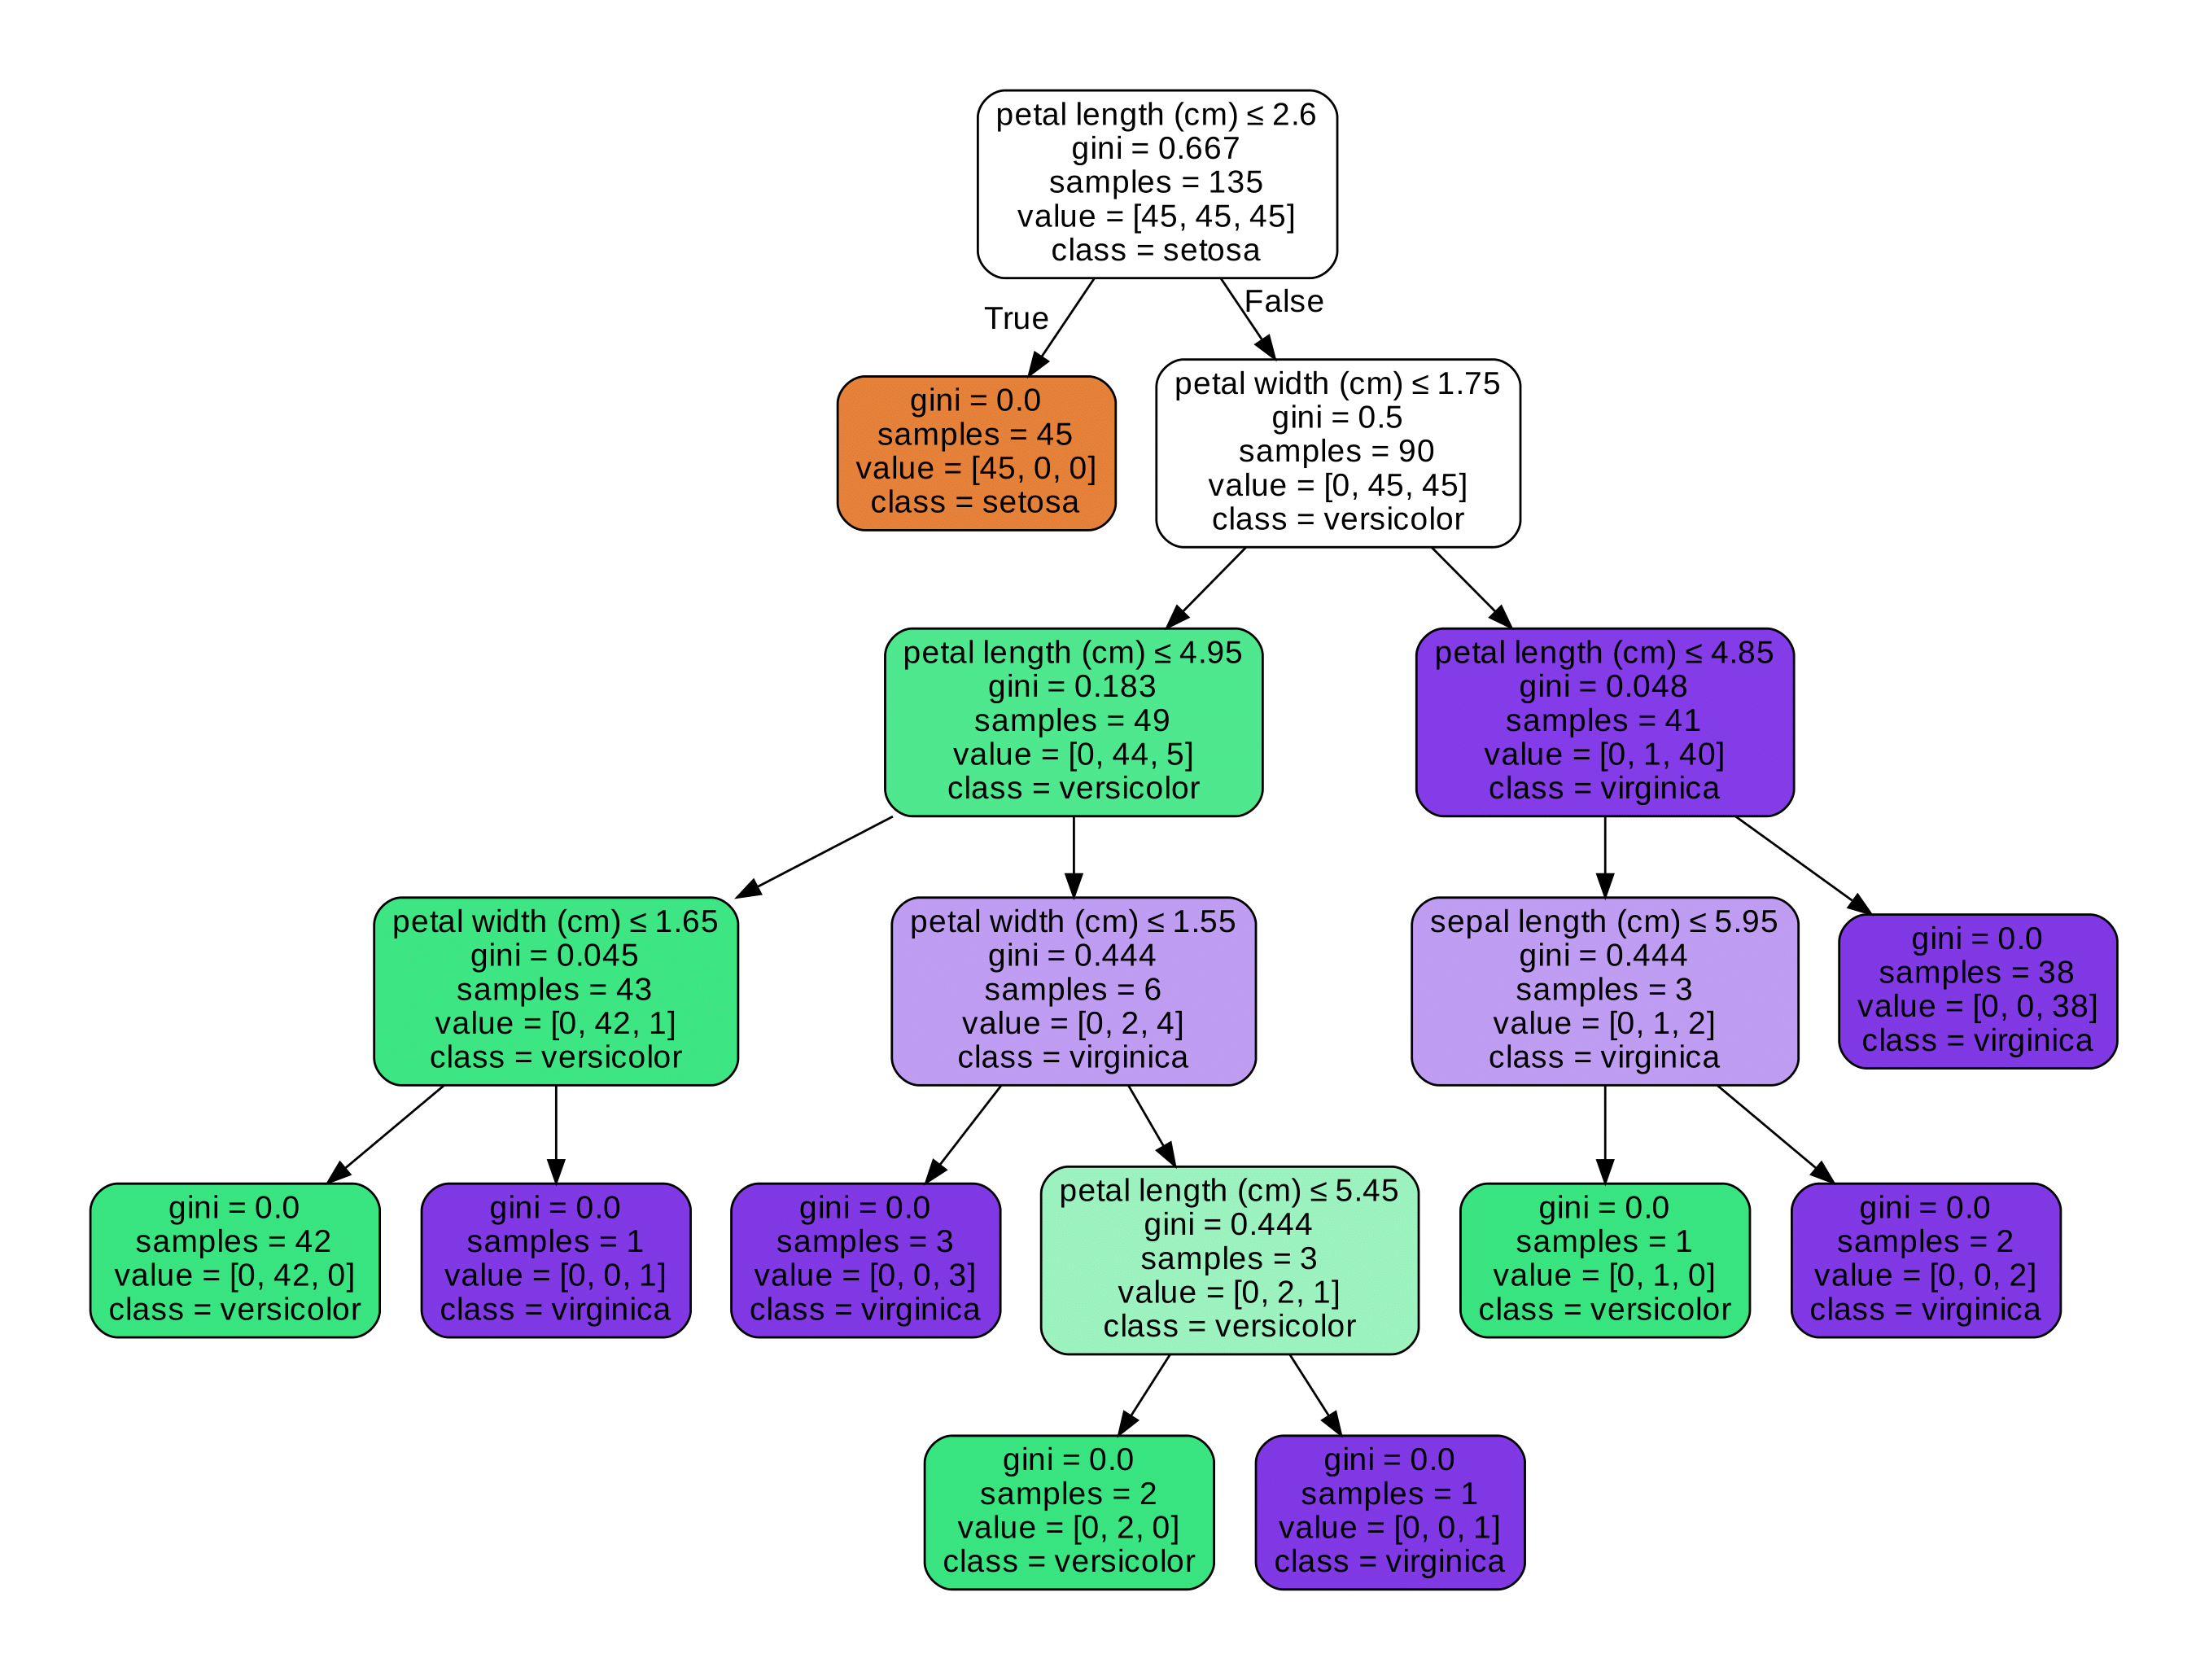

In [24]:
## This is for an `png` image
from IPython.display import Image

fig = Image(filename=('/content/iris-1.png'), width=800, height=600)
fig